作业一：基于Sesame，获取所有NGC天体的位置

想法是循环NGC的各个是否存在，存在就保存到list里

In [2]:
from astropy import units as u
import astropy
from astropy.coordinates import SkyCoord
from tqdm import tqdm
import time
import astropy.coordinates as coord
# Pos=SkyCoord.from_name('NGC 7')

In [14]:
NGC = []
for i in range(10000):
    try:
        Pos=SkyCoord.from_name('NGC '+str(i))
        NGC.append([i,Pos.to_string('decimal')])
    except:
        continue

### 看看其他同学怎么跑出来的？

跑了三个小时没出来，发现这种循环应该不是做作业的方法

In [3]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u
from tqdm import tqdm
def get_ngc_coordinates(ngc_number):
    custom_simbad = Simbad()
    custom_simbad.add_votable_fields('ra', 'dec')  # 添加赤经和赤纬
    
    # NGC 对象名称，如 NGC 224 是仙女座星系
    object_name = f"NGC {ngc_number}"
    
    try:
        result = custom_simbad.query_object(object_name)
        if result:
            ra_str = result['RA'][0]
            dec_str = result['DEC'][0]
            
            # 将赤经和赤纬转换为度
            coord = SkyCoord(ra=ra_str, dec=dec_str, unit=(u.hourangle, u.deg))
            ra_deg = coord.ra.deg
            dec_deg = coord.dec.deg
            
            # return f"NGC {ngc_number} coordinates: RA = {ra_deg} degrees, Dec = {dec_deg} degrees"
            return ra_deg, dec_deg
        else:
            return f"NGC {ngc_number} not found."
    except Exception as e:
        # return f"Error occurred: {e}"
        return None

# 查询 NGC 224（仙女座星系）的坐标
ngc_number = 224
coordinates = get_ngc_coordinates(ngc_number)

print(coordinates)


(10.684708333333331, 41.26875)


In [4]:
NGC = []
for ngc_number in tqdm(range(1, 8000)):  # 假设查询 NGC 1 到 NGC 9
    coordinates = get_ngc_coordinates(ngc_number)
    if coordinates is not None:
        NGC.append([ngc_number,coordinates[0],coordinates[1]])
        time.sleep(0.1)


100%|██████████| 7999/7999 [2:23:02<00:00,  1.07s/it]


In [5]:
NGC


[[1, 1.8160675, 27.70806111111111],
 [2, 1.8213149999999998, 27.67834277777778],
 [3, 1.8199912499999997, 8.30166],
 [4, 1.8516666666666663, 8.375],
 [5, 1.9536079166666664, 35.36226194444445],
 [6, 'N', 'G'],
 [7, 2.087333333333333, -29.915],
 [8, 2.1887499999999998, 23.83861111111111],
 [9, 2.2278441666666664, 23.81689527777778],
 [10, 2.143912083333333, -33.85838805555556],
 [11, 2.177058333333333, 37.44788611111111],
 [12, 2.1864216666666665, 4.612574166666667],
 [13, 2.1988125, 33.43332611111111],
 [14, 2.1926316666666663, 15.816956944444444],
 [15, 2.2603287499999993, 21.62457361111111],
 [16, 2.2678162499999996, 27.729409166666667],
 [17, 2.7775499999999993, -12.107869444444445],
 [18, 'N', 'G'],
 [19, 2.670314166666666, 32.98296055555556],
 [20, 2.3861774999999996, 33.30874138888888],
 [21, 'N', 'G'],
 [22, 2.4508441666666663, 27.8322575],
 [23, 2.4725458333333328, 25.92373888888889],
 [24, 2.485591666666666, -24.963130555555555],
 [25, 2.4970416666666666, -57.020805555555555],

In [6]:
len(NGC)

7977

In [11]:
import numpy as np
ngc = np.array(NGC)
np.save('NGC.npy',ngc)

分别在赤道坐标系和银道坐标系画出天球位置分布（可以适当阐述分布特征：如是否有成团性）

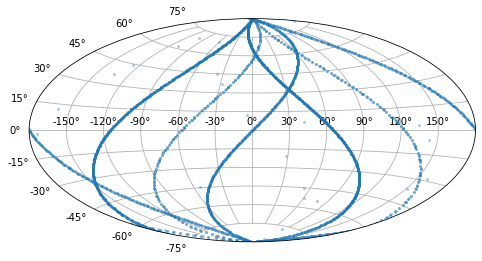

In [2]:
import matplotlib.pyplot as plt
import numpy as np
ngc = np.load('NGC.npy')
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
# plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(ngc[:,1], ngc[:,2], 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

应该是有字符串的问题

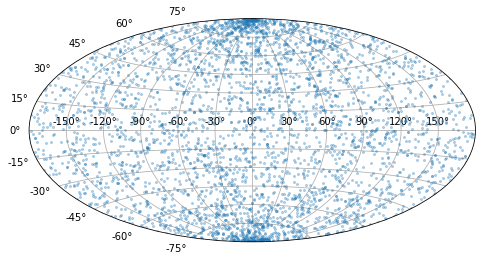

In [3]:
ngc1 = np.load('NGC.npy')
ngc2 = [[eval(j) for j in i] for i in ngc1 if i[1]!='N']
ngc = np.array(ngc2)
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
# plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(ngc[:,1], ngc[:,2], 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

上图应该还不是，南北极太密集了。

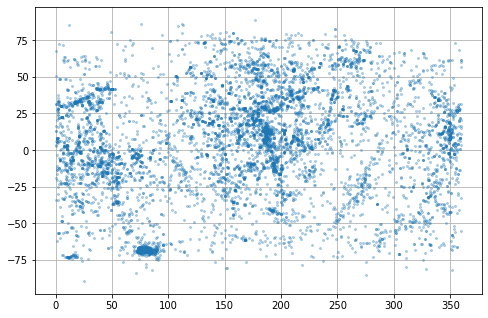

In [4]:
plt.figure(figsize=(8,4.2))
plt.subplot(111)
# plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(ngc[:,1], ngc[:,2], 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

In [6]:
coords = SkyCoord(ra=ngc[:,1], dec=ngc[:,2], unit=(u.deg, u.deg))
ra_radian = np.deg2rad(coords.ra.wrap_at(180 * u.deg).value)
dec_radian = np.deg2rad(coords.dec.value)

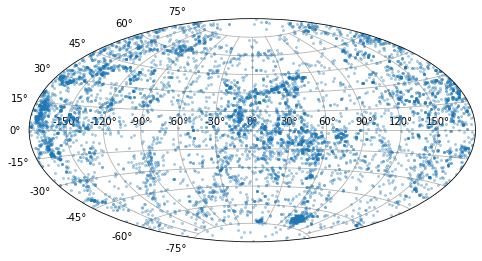

In [8]:
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
# plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(ra_radian, dec_radian, 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

赤道坐标系画到天球位置分布图上的效果

In [9]:
# 使用 SkyCoord 转换为天球上的赤道坐标
coords = SkyCoord(ra=ngc[:,1], dec=ngc[:,2], unit=(u.deg, u.deg), frame='icrs')

# 转换为银道坐标
galactic_coords = coords.galactic

# 提取银道坐标的经度和纬度
l_rad = np.deg2rad(galactic_coords.l.wrap_at(180 * u.deg).value)  # 银道经度，映射到[-180, 180]区间
b_rad = np.deg2rad(galactic_coords.b.value)  # 银道纬度

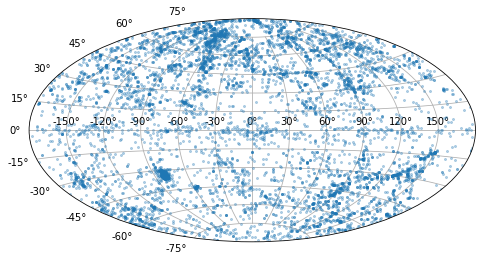

In [10]:
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
# plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(l_rad, b_rad, 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

银道坐标系画到天球位置分布图上的效果

Heapix分区NSIDE至少为多少时，保证每个pixel中只有一个星系？


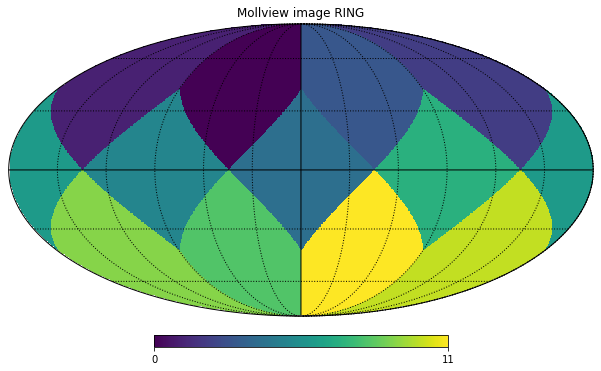

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

NSIDE = 1
NPIX = hp.nside2npix(NSIDE)
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()
plt.show()


[-7.07106781e-01  7.07106781e-01  6.12323400e-17]
[1271 1272 1335 1336 1337 1398 1399 1400 1401 1463 1464 1465 1526 1527
 1528 1529 1591 1592 1593 1654 1655 1656 1657 1719 1720 1721 1783 1784]


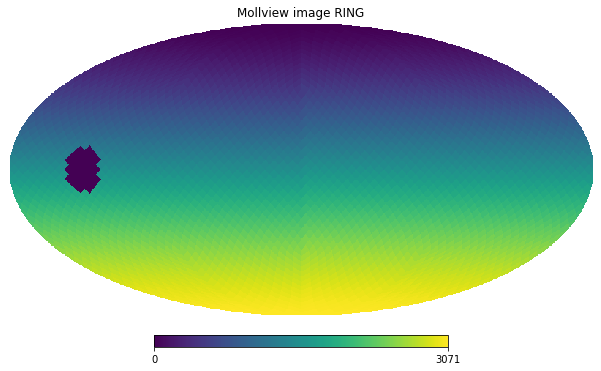

In [44]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

NSIDE = 16
NPIX = hp.nside2npix(NSIDE) #以给出map中的像素数目NPIX
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)
ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(10))##查找对应的像素块
print(ipix_disc)
m = np.arange(NPIX)
m[ipix_disc] = m.min()
hp.mollview(m, title="Mollview image RING")
plt.show()


In [48]:
ipix_disc = hp.ang2pix(nside=NSIDE, theta=np.pi / 2, phi=np.pi * 3 / 4)#查找对应的像素块
print(ipix_disc)

1528


In [46]:
NSIDE = 1
ipix_disc = hp.ang2pix(nside=NSIDE, theta=np.pi / 2, phi=np.pi * 3 / 4)


1528

In [50]:
# 使用 SkyCoord 转换为天球上的赤道坐标
coords = SkyCoord(ra=ngc[:,1], dec=ngc[:,2], unit=(u.deg, u.deg), frame='icrs')
# 提取赤道坐标中的RA和Dec
ra_rad = np.deg2rad(coords.ra.value)   # 将RA转换为弧度
dec_rad = np.deg2rad(coords.dec.value) # 将Dec转换为弧度

# 在HEALPix中，θ是纬度 (π/2 - Dec)，φ是经度 (RA)
theta = np.pi / 2 - dec_rad  # HEALPix 中的 θ 是从北天极开始的
phi = ra_rad  # HEALPix 中的 φ 是赤经 (RA)

# 设置 HEALPix 分辨率，Nside决定了HEALPix的分辨率，Nside越大，分辨率越高
nside = 64  # 示例：Nside=64，分辨率相对较低，但足够可视化
pix_nums = hp.ang2pix(nside, theta, phi)
print("HEALPix Pixel Len:", len(pix_nums))
print("HEALPix Pixel Numbers:", pix_nums)

HEALPix Pixel Len: 7460
HEALPix Pixel Numbers: [12929 12929 20865 ... 20865 20865 12929]


In [51]:
aaa = False
while aaa:
    nside = 1
    pix_nums = hp.ang2pix(nside, theta, phi)
    if len(pix_nums)==len(set(pix_nums)):
        aaa=True
    else:
        nside+=1

print(nside)

64


Heapix分区NSIDE至少为64时，保证每个pixel中只有一个星系(只针对我现在跑出来的7400多个星系时)


LAMOST的视场半径2.5度，某次观测视场中心为（Ra，Dec) =（110，30），请在天球坐标中准确画出LAMOST的视场观测范围。（选做）

1.9198621771937625 0.5235987755982988


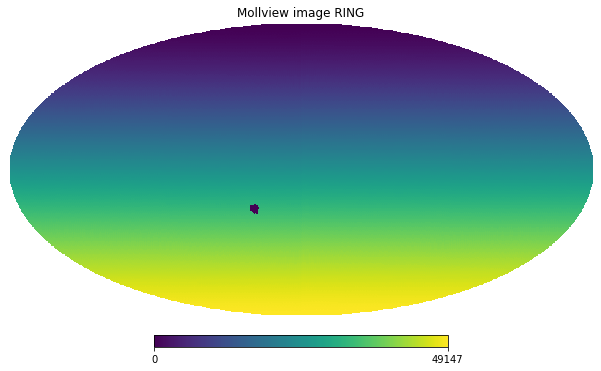

In [9]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

NSIDE = 64
NPIX = hp.nside2npix(NSIDE) #以给出map中的像素数目NPIX

# 使用 SkyCoord 转换为天球上的赤道坐标
coords = SkyCoord(ra=110, dec=30, unit=(u.deg, u.deg), frame='icrs')
# 提取赤道坐标中的RA和Dec
ra_rad = np.deg2rad(coords.ra.value)   # 将RA转换为弧度
dec_rad = np.deg2rad(coords.dec.value) # 将Dec转换为弧度
print(ra_rad, dec_rad)

# # 在HEALPix中，θ是纬度 (π/2 - Dec)，φ是经度 (RA)
# theta = np.pi / 2 - dec_rad  # HEALPix 中的 θ 是从北天极开始的
# phi = ra_rad  # HEALPix 中的 φ 是赤经 (RA)

# pix_nums = hp.ang2pix(NSIDE, theta, phi)
# print(pix_nums)
vec = hp.ang2vec(ra_rad, dec_rad)
# print(vec)
ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(2.5))##查找对应的像素块
# print(ipix_disc)
m = np.arange(NPIX)
m[ipix_disc] = m.min()
hp.mollview(m, title="Mollview image RING")
plt.show()

### SSY 视场中心在北天，这个投影是是什么？

## 2.2 银河系的光度大概是10<sup>11</sup>太阳光度，半光度半径Re大约是5Kpc。(太阳的V波段绝对星等是4.8等）。如果银河系距离观测者的距离是100kpc，其视星等和Re的视尺度（apparent size）各是多少？Re内的平均表面亮度是多少？如果距离是1Mpc呢？

银河系的Re=5kpc,M=4.8,银河系流量是太阳的10<sup>11</sup>倍。  
d = 100kpc  
M-M<sub>sun</sub>=-2.5lg(F/F<sub>sun</sub>)

In [10]:
M=4.8-2.5*11
print('银河系的绝对星等：',M,'mag')

银河系的绝对星等： -22.7 mag


In [11]:
m = M + 5*(np.log10(100*1000)-1)
print('视星等：',m,'mag')

视星等： -2.6999999999999993 mag


In [12]:
angle = np.arctan(5/100)
print('Re的视尺度：',angle*180/np.pi,'°')

Re的视尺度： 2.8624052261117474 °


In [13]:
r = angle*3600/2
print('r:',r,'arcsec')
surfaceb = m + 2.5 * np.log10(np.pi*r**2)
print('surface brightenss:',surfaceb,'mag/arcsec/arcsec')

r: 89.92511229949697 arcsec
surface brightenss: 8.312279625949069 mag/arcsec/arcsec


In [14]:
m = M + 5*(np.log10(1000*1000)-1)
print('视星等：',m,'mag')

视星等： 2.3000000000000007 mag


In [15]:
angle = np.arctan(5/1000)
print('Re的视尺度：',angle*180/np.pi,'°')

Re的视尺度： 0.2864765102770745 °


In [16]:
r = angle*3600/2
print('r:',r,'arcsec')
surfaceb = m + 2.5 * np.log10(np.pi*r**2)
print('surface brightenss:',surfaceb,'mag/arcsec/arcsec')

r: 8.99992500112498 arcsec
surface brightenss: 8.31406913352458 mag/arcsec/arcsec


## SSY: 星系的表面亮度没那么亮，18左右，哪里错了？